<a href="https://colab.research.google.com/github/7smn2219/AI/blob/main/Access_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code by Harish

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import defaultdict

# Read data from CSV file
#df = pd.read_csv('user_access.csv')
df = pd.read_csv('/content/user_access_datav1.csv')
grouped_data = df.groupby(["Username","Department", "Job Title"])["Role or Permission"].apply(",".join).reset_index()
#print(grouped_data)
# Separate access values into multiple columns
col_list = pd.Series(df['Role or Permission'].unique()).str.split(',')
dfcollist = col_list .explode()
access_cols = dfcollist.unique()
# Split access column into separate columns
access_values = grouped_data["Role or Permission"].str.split(",")
#print(access_values)
for value in access_cols:
    grouped_data[f"{value.strip()}"] = False
#print(grouped_data)
grouped_data.drop("Role or Permission", axis=1, inplace=True)
for i in range(len(grouped_data)):
    for value in access_values.iloc[i]:
        grouped_data.loc[i, [value]] = True
#print(grouped_data)


# Print the result
#print(combined_df[:,0:2])

#print(grouped_df.mean())  # Example: calculate group means
# Prepare categorical features for clustering
encoded_features = pd.get_dummies(grouped_data[['Department', 'Job Title']])

# Define DBSCAN parameters
eps = 0.5  # Experiment with different values
min_samples = int(0.2 * grouped_data.shape[0])  # Adjust for density

# Create and fit DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(encoded_features)

# Analyze clusters
#for i in range(-1, len(set(dbscan.labels_)) - 1):  # Include noise (-1)
for i in range(-1, len(set(dbscan.labels_)) ):  # Include noise (-1)
    cluster_users = grouped_data.loc[dbscan.labels_ == i]
    #print (cluster_users)
    if cluster_users.shape[0] >= 5  :  # Apply 80% threshold -- Minimum 3 records in the cluster
        common_accesses = []
        for col in access_cols:
            #print(cluster_users[col])
            #print(cluster_users[col].mean())
            if cluster_users[col].mean() >= 0.99:
                common_accesses.append(col)

        if common_accesses:
            #print(f"Cluster {i+1} (Noise if -1): {common_accesses}")
            cluster_info = pd.concat([pd.DataFrame(cluster_users['Department'].unique(), columns=['Department']),
                                     pd.DataFrame(cluster_users['Job Title'].unique(), columns=['Job Title'])], axis=1)
            # Print formatted cluster information
            print(f"Cluster {i+1} (Noise if -1):")
            for index, row in cluster_info.iterrows():
                print(f"  - Department: {row['Department']}, Job Title: {row['Job Title']}")
            print(f"    Common Accesses: {common_accesses}")
"""
            """

Cluster 3 (Noise if -1):
  - Department: Finance, Job Title: Analyst
    Common Accesses: ['Sales_manager', 'Power User Role', 'Report Reviewer', 'Auditor']


'\n            '

#PreViz

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/user_access_datav1.csv") #Source_Data

In [ ]:
(df.head(20))

,First Name,Last Name,Username,Department,Job Title,County,Application Name,Account Name,Role or Permission,EmployeeType
0,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Sales_manager,Employee
1,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Operator Role,Employee
2,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Power User Role,Employee
3,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Report Reviewer,Employee
4,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Sales_manager,Employee
5,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Operator Role,Employee
6,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Power User Role,Employee
7,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Report Reviewer,Employee
8,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Auditor,Employee
9,David,Galdeen,dgaldeen,Marketing,Analyst,Colonia,Active Directory,dgaldeen,Sales_manager,Employee


In [ ]:
df.shape

(42, 10)

In [ ]:
list(df.head())

['First Name',
 'Last Name',
 'Username',
 'Department',
 'Job Title',
 'County',
 'Application Name',
 'Account Name',
 'Role or Permission',
 'EmployeeType']

Useful Features

- Username/ Account Name
- Job Title
- Role or Permission
- Application name (potential)

#Data Processing and Feature Engineering

In [ ]:
import csv

input_file = '/content/user_access_datav1.csv'
output_file = 'processed_access_data.csv'

columns_to_keep = ['Username', 'Job Title', 'Role or Permission']

with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
    reader = csv.DictReader(input_csv)
    writer = csv.DictWriter(output_csv, fieldnames=columns_to_keep)

    writer.writeheader()

    for row in reader:
        new_row = {col: row[col] for col in columns_to_keep}
        writer.writerow(new_row)

print(f"Data extracted from '{input_file}' and written to '{output_file}'.")

Data extracted from '/content/user_access_datav1.csv' and written to 'processed_access_data.csv'.


In [ ]:
df_processed = pd.read_csv("/content/processed_access_data.csv")

In [ ]:
df_processed.head()

,Username,Job Title,Role or Permission
0,jdonahue,Director,Sales_manager
1,jdonahue,Director,Operator Role
2,jdonahue,Director,Power User Role
3,jdonahue,Director,Report Reviewer
4,bsmith,Manager,Sales_manager


In [ ]:
df_processed.shape

(42, 3)

In [ ]:
list(df_processed.head())

['Username', 'Job Title', 'Role or Permission']

In [ ]:
df = df_processed.iloc[:, [1,2]].values

In [ ]:
df

array([['Director', 'Sales_manager'],
       ['Director', 'Operator Role'],
       ['Director', 'Power User Role'],
       ['Director', 'Report Reviewer'],
       ['Manager', 'Sales_manager'],
       ['Manager', 'Operator Role'],
       ['Manager', 'Power User Role'],
       ['Manager', 'Report Reviewer'],
       ['Manager', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Rev

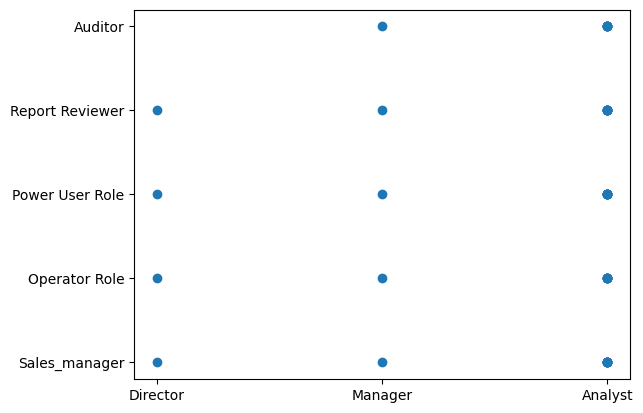

In [ ]:
plt.scatter(df[:,0], df[:,1])

In [ ]:
df = pd.read_csv('/content/processed_access_data.csv')

job_title_mapping = {
    'Director': 1,
    'Manager': 2,
    'Analyst': 3
}

role_permission_mapping = {
    'Sales_manager': 1,
    'Operator Role': 2,
    'Power User Role': 3,
    'Report Reviewer': 4,
    'Auditor': 5
}

df['Job Title'] = df['Job Title'].map(job_title_mapping)
df['Role or Permission'] = df['Role or Permission'].map(role_permission_mapping)

print(df)

df.to_csv('num_processed_access_data.csv', index=False)


     Username  Job Title  Role or Permission
0    jdonahue          1                   1
1    jdonahue          1                   2
2    jdonahue          1                   3
3    jdonahue          1                   4
4      bsmith          2                   1
5      bsmith          2                   2
6      bsmith          2                   3
7      bsmith          2                   4
8      bsmith          2                   5
9    dgaldeen          3                   1
10   dgaldeen          3                   2
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
14    dkrause          3                   2
15    dkrause          3                   3
16    dkrause          3                   4
17    dkrause          3                   5
18      ktill          3                   1
19      ktill          3                   2
20      ktill          3                   3
21      kt

In [ ]:
df_num = pd.read_csv("/content/num_processed_access_data.csv")

In [ ]:
df_num.head()

,Username,Job Title,Role or Permission
0,jdonahue,1,1
1,jdonahue,1,2
2,jdonahue,1,3
3,jdonahue,1,4
4,bsmith,2,1


In [ ]:
#skip to phase 2
df_num.shape

(42, 3)

In [ ]:
list(df_num.head())

['Username', 'Job Title', 'Role or Permission']

In [ ]:
df = df_num.iloc[:, [1,2]].values

In [ ]:
df

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 3],
       [3, 4],
       [3, 5]])

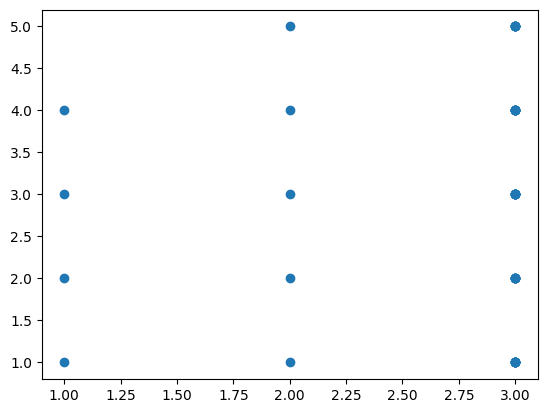

In [ ]:
plt.scatter(df[:,0], df[:,1])

In [ ]:
dbs_clust_model = DBSCAN().fit(df)
dbs_clust_model

DBSCAN()

In [ ]:
print(len(dbs_clust_model.labels_))
print(len(df))


42
42


In [ ]:
print(dbs_clust_model.labels_)


[-1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  3  0  1  2  3  4  0  1  2  3  4  0
  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  2  3  4]


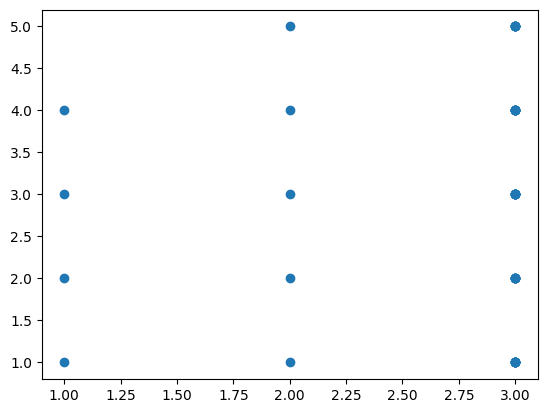

In [ ]:
plt.scatter(df[:,0], df[:,1])

#Phase 2

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('num_processed_access_data.csv')

df.head()

,Username,Job Title,Role or Permission
0,jdonahue,1,1
1,jdonahue,1,2
2,jdonahue,1,3
3,jdonahue,1,4
4,bsmith,2,1


In [ ]:
X = df[['Job Title', 'Role or Permission']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.75, min_samples=1)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

print(df)


     Username  Job Title  Role or Permission  Cluster
0    jdonahue          1                   1        0
1    jdonahue          1                   2        0
2    jdonahue          1                   3        0
3    jdonahue          1                   4        0
4      bsmith          2                   1        1
5      bsmith          2                   2        1
6      bsmith          2                   3        1
7      bsmith          2                   4        1
8      bsmith          2                   5        1
9    dgaldeen          3                   1        2
10   dgaldeen          3                   2        2
11   dgaldeen          3                   3        2
12   dgaldeen          3                   4        2
13    dkrause          3                   1        2
14    dkrause          3                   2        2
15    dkrause          3                   3        2
16    dkrause          3                   4        2
17    dkrause          3    

In [ ]:
df.to_csv('access_control_clustered.csv', index=False)

In [ ]:
grouped = df.groupby('Cluster')
for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    print(group[['Job Title', 'Role or Permission']])



Cluster 0:
   Job Title  Role or Permission
0          1                   1
1          1                   2
2          1                   3
3          1                   4

Cluster 1:
   Job Title  Role or Permission
4          2                   1
5          2                   2
6          2                   3
7          2                   4
8          2                   5

Cluster 2:
    Job Title  Role or Permission
9           3                   1
10          3                   2
11          3                   3
12          3                   4
13          3                   1
14          3                   2
15          3                   3
16          3                   4
17          3                   5
18          3                   1
19          3                   2
20          3                   3
21          3                   4
22          3                   5
23          3                   1
24          3                   2
25          3          

In [ ]:
import numpy as np

import numpy as np

new_user = pd.DataFrame({'Job Title': [2], 'Role or Permission': [4]})

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

suggested_role = df[df['Cluster'] == nearest_cluster]['Role or Permission'].mode()[0]

persons_with_role = df[(df['Cluster'] == nearest_cluster) &
                       (df['Role or Permission'] == suggested_role)]

print(f"Suggested Role for the new user: {suggested_role}")
print("Persons with this role in the cluster:")
print(persons_with_role[['Username', 'Job Title', 'Role or Permission']])

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

suggested_role = df[df['Cluster'] == nearest_cluster]['Role or Permission'].mode()[0]

persons_with_role = df[(df['Cluster'] == nearest_cluster) &
                       (df['Role or Permission'] == suggested_role)]

print(f"Suggested Role for the new user: {suggested_role}")
print("Persons with this role in the cluster:")
print(persons_with_role[['Username', 'Job Title', 'Role or Permission']])


Suggested Role for the new user: 1
Persons with this role in the cluster:
  Username  Job Title  Role or Permission
4   bsmith          2                   1
Suggested Role for the new user: 1
Persons with this role in the cluster:
  Username  Job Title  Role or Permission
4   bsmith          2                   1


job_title_mapping = {
    'Director': 1,
    'Manager': 2,
    'Analyst': 3
}

role_permission_mapping = {
    'Sales_manager': 1,
    'Operator Role': 2,
    'Power User Role': 3,
    'Report Reviewer': 4,
    'Auditor': 5
}

In [ ]:
import numpy as np
import pandas as pd

new_user = pd.DataFrame({'Job Title': [3], 'Role or Permission': [2]})

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))


nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()


persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]


print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")
print("Persons with these roles in the cluster:")
print(persons_with_roles[['Username', 'Job Title', 'Role or Permission']])


Suggested Role(s) for the new user: 1, 3, 4
Persons with these roles in the cluster:
     Username  Job Title  Role or Permission
9    dgaldeen          3                   1
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
15    dkrause          3                   3
16    dkrause          3                   4
18      ktill          3                   1
20      ktill          3                   3
21      ktill          3                   4
23   jjackson          3                   1
25   jjackson          3                   3
26   jjackson          3                   4
28     dkress          3                   1
30     dkress          3                   3
31     dkress          3                   4
33  jpisarski          3                   1
35  jpisarski          3                   3
36  jpisarski          3                   4
38    dharris          3                   1
39    dharris  

In [ ]:
from prettytable import PrettyTable

job_title_mapping = { 'Director': 1, 'Manager': 2, 'Analyst': 3 }
role_permission_mapping = { 'Sales_manager': 1, 'Operator Role': 2, 'Power User Role': 3, 'Report Reviewer': 4, 'Auditor': 5 }

job_title_table = PrettyTable()
job_title_table.field_names = ["Job Title", "Code"]

for title, code in job_title_mapping.items():
    job_title_table.add_row([title, code])

print("Job Title Mapping:")
print(job_title_table)

role_permission_table = PrettyTable()
role_permission_table.field_names = ["Role or Permission", "Code"]

for role, code in role_permission_mapping.items():
    role_permission_table.add_row([role, code])

print("\nRole and Permission Mapping:")
print(role_permission_table)


Job Title Mapping:
+-----------+------+
| Job Title | Code |
+-----------+------+
|  Director |  1   |
|  Manager  |  2   |
|  Analyst  |  3   |
+-----------+------+

Role and Permission Mapping:
+--------------------+------+
| Role or Permission | Code |
+--------------------+------+
|   Sales_manager    |  1   |
|   Operator Role    |  2   |
|  Power User Role   |  3   |
|  Report Reviewer   |  4   |
|      Auditor       |  5   |
+--------------------+------+


#Full Send

job_title_mapping = { 'Director': 1, 'Manager': 2, 'Analyst': 3 }

role_permission_mapping = { 'Sales_manager': 1, 'Operator Role': 2, 'Power User Role': 3, 'Report Reviewer': 4, 'Auditor': 5 }

In [ ]:
job_title_code = [3]
roles_code = [4]

new_user = pd.DataFrame({
    'Job Title': job_title_code * len(roles_code),
    'Role or Permission': roles_code
})
new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    avg_distance = np.mean([np.linalg.norm(new_user_scaled[i] - centroid) for i in range(len(new_user_scaled))])
    distances.append((cluster[0], avg_distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()

persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]

print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")
print("Persons with these roles in the cluster:")
print(persons_with_roles[['Username', 'Job Title', 'Role or Permission']])

Suggested Role(s) for the new user: 1, 3, 4
Persons with these roles in the cluster:
     Username  Job Title  Role or Permission
9    dgaldeen          3                   1
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
15    dkrause          3                   3
16    dkrause          3                   4
18      ktill          3                   1
20      ktill          3                   3
21      ktill          3                   4
23   jjackson          3                   1
25   jjackson          3                   3
26   jjackson          3                   4
28     dkress          3                   1
30     dkress          3                   3
31     dkress          3                   4
33  jpisarski          3                   1
35  jpisarski          3                   3
36  jpisarski          3                   4
38    dharris          3                   1
39    dharris  

In [ ]:
from prettytable import PrettyTable

job_title = [2]
roles = [2]

new_user = pd.DataFrame({
    'Job Title': job_title * len(roles),
    'Role or Permission': roles
})
new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    avg_distance = np.mean([np.linalg.norm(new_user_scaled[i] - centroid) for i in range(len(new_user_scaled))])
    distances.append((cluster[0], avg_distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()

persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]

print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")

table = PrettyTable()
table.field_names = ["Username", "Job Title", "Role or Permission"]

for _, row in persons_with_roles[['Username', 'Job Title', 'Role or Permission']].iterrows():
    table.add_row([row['Username'], row['Job Title'], row['Role or Permission']])

print("Persons with these roles in the cluster:")
print(table)


Suggested Role(s) for the new user: 1, 2, 3, 4, 5
Persons with these roles in the cluster:
+----------+-----------+--------------------+
| Username | Job Title | Role or Permission |
+----------+-----------+--------------------+
|  bsmith  |     2     |         1          |
|  bsmith  |     2     |         2          |
|  bsmith  |     2     |         3          |
|  bsmith  |     2     |         4          |
|  bsmith  |     2     |         5          |
+----------+-----------+--------------------+
